https://docs.google.com/document/d/15_vZJejk7rqNGVAKN8gkISXK2iqEmzJPSfvqr_PkIA0/edit

https://www.kaggle.com/tunguz/200000-jeopardy-questions

In [1]:
import os

os.listdir()

['.ipynb_checkpoints', 'JEOPARDY_CSV.csv', 'value_prediciton.ipynb']

In [2]:
import pandas as pd

data = pd.read_csv('JEOPARDY_CSV.csv')
data_copy = data.copy()
data.shape

(216930, 7)

In [3]:
data.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1    Air Date    216930 non-null  object
 2    Round       216930 non-null  object
 3    Category    216930 non-null  object
 4    Value       216930 non-null  object
 5    Question    216930 non-null  object
 6    Answer      216928 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


In [5]:
data.isnull().sum()

Show Number    0
 Air Date      0
 Round         0
 Category      0
 Value         0
 Question      0
 Answer        2
dtype: int64

In [6]:
# data[data.Answer.isnull()]

In [7]:
data.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [8]:
data.columns = ['Show_Number', 'Air_Date', 'Round', 'Category', 'Value', 'Question', 'Answer']
data.columns

Index(['Show_Number', 'Air_Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

In [9]:
data[data.Answer.isnull()]

,Show_Number,Air_Date,Round,Category,Value,Question,Answer
94817,4346,2003-06-23,Jeopardy!,"GOING ""N""SANE",$200,"It often precedes ""and void""",NaN
143297,6177,2011-06-21,Double Jeopardy!,NOTHING,$400,"This word for ""nothing"" precedes ""and void"" to...",NaN


In [10]:
print(data.shape)
data.drop(data[data.Answer.isnull()].index, inplace=True)
print(data.shape)

(216930, 7)
(216928, 7)


In [11]:
import re

chars = []
for string in data.Value:
    chars.extend(re.findall('[^0-9]', string))
chars_set = set(chars)
chars_set

{'$', ',', 'N', 'e', 'n', 'o'}

In [12]:
# re.findall('[^0-9^a-z^A-Z]', "abed#%67Ag")

In [13]:
data.Value = data.Value.map(lambda x: re.sub('[\$,]',"",x))
data.head()

,Show_Number,Air_Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [14]:
chars_strings = []
for string in data.Value:
    if re.findall('[^0-9]', string):
        chars_strings.append(string)
chars_strings

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 

In [15]:
data[data.Value=='None']

,Show_Number,Air_Date,Round,Category,Value,Question,Answer
55,4680,2004-12-31,Final Jeopardy!,THE SOLAR SYSTEM,None,Objects that pass closer to the sun than Mercu...,Icarus
116,5957,2010-07-06,Final Jeopardy!,HISTORIC WOMEN,None,She was born in Virginia around 1596 & died in...,Pocahontas
174,3751,2000-12-18,Final Jeopardy!,SPORTS LEGENDS,None,If Joe DiMaggio's hitting streak had gone one ...,H.J. Heinz (Heinz 57 Varieties)
235,3673,2000-07-19,Final Jeopardy!,THE MAP OF EUROPE,None,"Bordering Italy, Austria, Hungary & Croatia, i...",Slovenia
296,4931,2006-02-06,Final Jeopardy!,FAMOUS SHIPS,None,"On December 27, 1831 it departed Plymouth, Eng...",the HMS Beagle
...,...,...,...,...,...,...,...
216686,3940,2001-10-19,Final Jeopardy!,MAJOR LEAGUE BASEBALL TEAM NAMES,None,This team received its name after an 1890 inci...,Pittsburgh Pirates
216746,6044,2010-12-16,Final Jeopardy!,SKYSCRAPERS,None,After a construction boom fueled by oil & gas ...,Moscow
216807,5070,2006-09-29,Final Jeopardy!,NATIONAL CAPITALS,None,"This city's website calls it ""the last divided...",Nicosia
216868,5195,2007-03-23,Final Jeopardy!,BESTSELLING AUTHORS,None,He had the year's bestselling novel a record 7...,John Grisham


In [16]:
print(data.shape)
data.drop(data[data.Value=='None'].index, inplace=True)
print(data.shape)

(216928, 7)
(213294, 7)


In [17]:
chars = []
for string in data.Value:
    chars.extend(re.findall('[^0-9]', string))
chars_set = set(chars)
chars_set

set()

In [18]:
data.Value = data.Value.astype(int)
data.dtypes

Show_Number     int64
Air_Date       object
Round          object
Category       object
Value           int32
Question       object
Answer         object
dtype: object

In [19]:
import numpy as np

Q1 = np.percentile(data.Value, 25, interpolation = 'midpoint') 
Q2 = np.percentile(data.Value, 50, interpolation = 'midpoint') 
Q3 = np.percentile(data.Value, 75, interpolation = 'midpoint') 
  
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

IQR, low_lim, up_lim

(600.0, -500.0, 1900.0)

In [20]:
outlier =[]
for x in data.Value:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(outlier)

[2000, 2000, 2000, 2000, 3200, 2000, 2000, 2000, 5000, 5000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 4800, 2000, 2000, 2000, 2000, 2000, 2000, 2200, 3400, 3000, 2000, 2000, 2000, 2000, 2000, 2000, 3000, 4000, 2000, 2000, 2000, 2000, 2000, 2000, 3000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 6800, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 4000, 2000, 2000, 3100, 3000, 3000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 3000, 2000, 2000, 2000, 3000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 5000, 2800, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 8000, 2000, 2000, 2000, 2000, 2000, 6000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2400, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 4000, 12000, 2000, 2000, 2000, 2000, 2000, 3800, 2000, 2000, 2000, 2000, 2000, 2000, 3000, 2000, 2000, 2000, 2000, 25

In [21]:
len(outlier)

15673

In [22]:
data[(data.Value<low_lim)|(data.Value>up_lim)]

,Show_Number,Air_Date,Round,Category,Value,Question,Answer
22,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,2000,"1939 Oscar winner: ""...you are a credit to you...",Hattie McDaniel (for her role in Gone with the...
41,4680,2004-12-31,Double Jeopardy!,AIRLINE TRAVEL,2000,"In 2003 this airline agreed to buy KLM, creati...",Air France
50,4680,2004-12-31,Double Jeopardy!,DR. SEUSS AT THE MULTIPLEX,2000,"<a href=""http://www.j-archive.com/media/2004-1...",Bartholomew Cubbins
51,4680,2004-12-31,Double Jeopardy!,AIRLINE TRAVEL,2000,In the seat pocket you'll find the catalog cal...,Mall
52,4680,2004-12-31,Double Jeopardy!,THAT OLD-TIME RELIGION,3200,In 1534 he & his buddy Francis Xavier founded ...,(St. Ignatius) Loyola
...,...,...,...,...,...,...,...
216924,4999,2006-05-11,Double Jeopardy!,OFF-BROADWAY,2000,In 2006 the cast of this long-running hit emba...,Stomp
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,2000,This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",2000,In North America this term is properly applied...,a titmouse
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,2000,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker


In [23]:
print(data.shape)
data.drop(data[(data.Value<low_lim)|(data.Value>up_lim)].index, inplace=True)
print(data.shape)

(213294, 7)
(197621, 7)


In [24]:
data.Air_Date = pd.to_datetime(data.Air_Date)

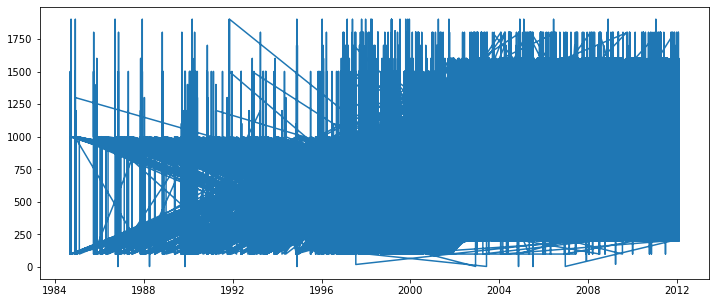

In [25]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(data.Air_Date, data.Value)
plt.show()

In [26]:
data = data.sort_values(by='Air_Date')
data.head()

,Show_Number,Air_Date,Round,Category,Value,Question,Answer
84539,1,1984-09-10,Jeopardy!,INVENTIONS,400,This fastener gets its name from a brand of ga...,the zipper
84555,1,1984-09-10,Double Jeopardy!,4-LETTER WORDS,400,Basketball defense or Serling's twilight area,zone
84556,1,1984-09-10,Double Jeopardy!,THE BIBLE,600,"According to the Bible, it wasn't necessarily ...",the forbidden fruit (or the fruit of the Tree ...
84557,1,1984-09-10,Double Jeopardy!,'50'S TV,600,Amount Michael Anthony gave out each week on b...,one million dollars
84558,1,1984-09-10,Double Jeopardy!,NATIONAL LANDMARKS,600,"The cornerstone of Massachusetts, it bears the...",Plymouth Rock


In [27]:
data.tail()

,Show_Number,Air_Date,Round,Category,Value,Question,Answer
105930,6300,2012-01-27,Jeopardy!,PANTS,200,"A synonym for freight, or pants with large bel...",cargo pants
105929,6300,2012-01-27,Jeopardy!,VISITING THE CITY,200,"Experience Little Havana along Calle Ocho, the...",Miami
105958,6300,2012-01-27,Jeopardy!,THE TRUTH LIES THEREIN,1000,A palindromic preposition of the past,ere
105942,6300,2012-01-27,Jeopardy!,PANTS,600,"When introduced, these wide, baggy pants were ...",plus fours
105957,6300,2012-01-27,Jeopardy!,LESSER-KNOWN SCIENTISTS,1000,In 1785 William Withering suggested using this...,digitalis (or digoxin)


In [28]:
chars = []
for string in data.Round:
    chars.extend(re.findall('[^a-z^A-Z]', string))
chars_set = set(chars)
chars_set

{' ', '!'}

In [29]:
data.Round.value_counts()

Jeopardy!           106827
Double Jeopardy!     90794
Name: Round, dtype: int64

In [30]:
data.Round = data.Round.map(lambda x: re.sub(" ", "_", x))
data.Round = data.Round.map(lambda x: re.sub("!", "", x))
chars = []
for string in data.Round:
    chars.extend(re.findall('[^a-z^A-Z]', string))
chars_set = set(chars)
chars_set

{'_'}

In [31]:
data.Category.value_counts()

BEFORE & AFTER           485
SCIENCE                  477
LITERATURE               461
POTPOURRI                389
AMERICAN HISTORY         384
                        ... 
THE SEVEN SISTERS          1
19th CENTURY LIFE          1
SPORTS NUMBER, PLEASE      1
THE AMERICAS               1
THE PLUMBER KNOWS          1
Name: Category, Length: 26943, dtype: int64

In [32]:
chars = []
for string in data.Category:
    chars.extend(re.findall('[^a-z^A-Z]', string))
chars_set = set(chars)
len(chars_set)

43

In [33]:
len(chars), len(chars_set)

(430015, 43)

In [34]:
chars = []
for string in data.Category:
    chars.append(re.findall('[^a-z^A-Z^0-9]', string))
len(chars)

197621

In [35]:
# ["".join(chars_) for chars_ in chars]

In [36]:
data['cat_special_chars'] = ["".join(chars_) for chars_ in chars]

In [37]:
chars = []
for string in data.Question:
    chars.extend(re.findall('[^a-z^A-Z^0-9]', string))
chars_set = set(chars)
len(chars_set)

62

In [38]:
chars = []
for string in data.Question:
    chars.append(re.findall('[^a-z^A-Z^0-9]', string))
len(chars)

197621

In [39]:
data['ques_special_chars'] = ["".join(chars_) for chars_ in chars]

In [40]:
chars = []
for string in data.Answer:
    chars.extend(re.findall('[^a-z^A-Z^0-9]', string))
chars_set = set(chars)
len(chars_set)

72

In [41]:
chars = []
for string in data.Answer:
    chars.append(re.findall('[^a-z^A-Z^0-9]', string))
len(chars)

197621

In [42]:
data['ans_special_chars'] = ["".join(chars_) for chars_ in chars]

In [43]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
data.head()

,Show_Number,Air_Date,Round,Category,Value,Question,Answer,cat_special_chars,ques_special_chars,ans_special_chars
84539,1,1984-09-10,Jeopardy,INVENTIONS,400,This fastener gets its name from a brand of galoshes it was used on,the zipper,,,
84555,1,1984-09-10,Double_Jeopardy,4-LETTER WORDS,400,Basketball defense or Serling's twilight area,zone,-,',
84556,1,1984-09-10,Double_Jeopardy,THE BIBLE,600,"According to the Bible, it wasn't necessarily an apple",the forbidden fruit (or the fruit of the Tree of Knowledge),,", '",( )
84557,1,1984-09-10,Double_Jeopardy,'50'S TV,600,Amount Michael Anthony gave out each week on behalf of John Beresford Tipton,one million dollars,'',,
84558,1,1984-09-10,Double_Jeopardy,NATIONAL LANDMARKS,600,"The cornerstone of Massachusetts, it bears the date 1620",Plymouth Rock,,",",


In [44]:
data['cat_len'] = [len(cat) for cat in data.Category]
data['que_len'] = [len(que) for que in data.Question]
data['ans_len'] = [len(ans) for ans in data.Answer]
data['special_char_len'] = [len(a)+len(b)+len(c) for a, b, c in zip(data.cat_special_chars, data.ans_special_chars, data.ques_special_chars)]
data['text_len'] = [a+b+c for a, b, c in zip(data.cat_len, data.que_len, data.ans_len)]
data.head()

,Show_Number,Air_Date,Round,Category,Value,Question,Answer,cat_special_chars,ques_special_chars,ans_special_chars,cat_len,que_len,ans_len,special_char_len,text_len
84539,1,1984-09-10,Jeopardy,INVENTIONS,400,This fastener gets its name from a brand of galoshes it was used on,the zipper,,,,10,67,10,14,87
84555,1,1984-09-10,Double_Jeopardy,4-LETTER WORDS,400,Basketball defense or Serling's twilight area,zone,-,',,14,45,4,8,63
84556,1,1984-09-10,Double_Jeopardy,THE BIBLE,600,"According to the Bible, it wasn't necessarily an apple",the forbidden fruit (or the fruit of the Tree of Knowledge),,", '",( ),9,54,59,23,122
84557,1,1984-09-10,Double_Jeopardy,'50'S TV,600,Amount Michael Anthony gave out each week on behalf of John Beresford Tipton,one million dollars,'',,,8,76,19,17,103
84558,1,1984-09-10,Double_Jeopardy,NATIONAL LANDMARKS,600,"The cornerstone of Massachusetts, it bears the date 1620",Plymouth Rock,,",",,18,56,13,11,87


In [45]:
data.corrwith(data.Value)

Show_Number         0.325125
Value               1.000000
cat_len             0.065325
que_len             0.113038
ans_len             0.051402
special_char_len    0.117417
text_len            0.126795
dtype: float64

In [46]:
data.Category.head(10)

84539            INVENTIONS
84555        4-LETTER WORDS
84556             THE BIBLE
84557              '50'S TV
84558    NATIONAL LANDMARKS
84559             NOTORIOUS
84560        4-LETTER WORDS
84561             THE BIBLE
84562              '50'S TV
84563    NATIONAL LANDMARKS
Name: Category, dtype: object

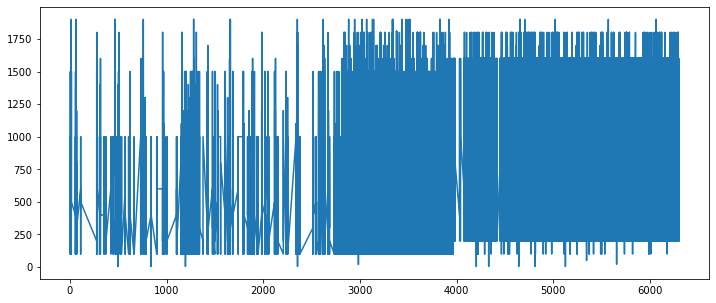

In [47]:
plt.figure(figsize=(12, 5))
plt.plot(data.Show_Number, data.Value)
plt.show()

In [48]:
data.Category = [string.lower() for string in data.Category]
data.Category.head(10)

84539            inventions
84555        4-letter words
84556             the bible
84557              '50's tv
84558    national landmarks
84559             notorious
84560        4-letter words
84561             the bible
84562              '50's tv
84563    national landmarks
Name: Category, dtype: object

In [49]:
chars = []
for string in data.Category:
    chars.extend(re.findall('[^a-z^A-Z^0-9]',string))
len(set(chars))

33

In [50]:
char_set = set(chars)

In [51]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [52]:
def pure_cats(data):
    cat_data = []
    for string in data:
        string = re.sub('[^0-9^a-z^A-Z^\-^\s^&]', "", string) 
        string = re.sub('  ', ' ', string)
        string = re.sub('the', ' ', string)
        string = re.sub('-', '_', string)
        strings = string.split('&')
        categories = ""
        for words in strings:
            cateogry = "_".join(words.split())
            categories = categories + " " + cateogry
        cat_data.append(categories.lstrip())
    return cat_data

pure_categories = pure_cats(data.Category)

In [53]:
pure_categories

['inventions',
 '4_letter_words',
 'bible',
 '50s_tv',
 'national_landmarks',
 'notorious',
 '4_letter_words',
 'bible',
 '50s_tv',
 'national_landmarks',
 '4_letter_words',
 'bible',
 '50s_tv',
 'national_landmarks',
 'notorious',
 '4_letter_words',
 'actors roles',
 'foreign_cuisine',
 'animals',
 'inventions',
 'notorious',
 'national_landmarks',
 '50s_tv',
 'bible',
 'foreign_cuisine',
 'actors roles',
 'lakes rivers',
 'inventions',
 'animals',
 'foreign_cuisine',
 'actors roles',
 'lakes rivers',
 'lakes rivers',
 'lakes rivers',
 'animals',
 'actors roles',
 'lakes rivers',
 'animals',
 'actors roles',
 'bible',
 '50s_tv',
 'national_landmarks',
 'notorious',
 '4_letter_words',
 'foreign_cuisine',
 'animals',
 'inventions',
 'transportation',
 'state_capitals',
 '40s',
 'transportation',
 'country_music',
 'wild_west',
 'by_numbers',
 'transportation',
 '40s',
 'state_capitals',
 'by_numbers',
 'country_music',
 'transportation',
 '40s',
 'state_capitals',
 'by_numbers',
 'count

In [54]:
data.Category = pure_categories

In [55]:
data.Question.head()

84539             This fastener gets its name from a brand of galoshes it was used on
84555                                   Basketball defense or Serling's twilight area
84556                          According to the Bible, it wasn't necessarily an apple
84557    Amount Michael Anthony gave out each week on behalf of John Beresford Tipton
84558                        The cornerstone of Massachusetts, it bears the date 1620
Name: Question, dtype: object

In [56]:
stop_words.remove('no')
stop_words.remove('nor')
stop_words.remove('not')

In [57]:
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

wnl = WordNetLemmatizer()


def pure_questions(data):
    urls = []
    q_data = []
    for string in tqdm(data):
        string = string.lower()
        if re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', string):
            urls.append('yes')
        else:
            urls.append('no')
        string = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', " ", string)
        string = string.replace('"', '')
        string = string.replace("'re", ' are')
        string = string.replace(',', '')
        string = re.sub('[^0-9^a-z^A-Z^\s]', "", string)
        string = re.sub('\s+', " ", string)
        q = ""
        words = string.split()
        words = [word for word in string.split() if word not in stop_words]
        for word in words:
            word = wnl.lemmatize(word, pos='v')
            q = q + " " + word
        q = q.strip()
        q_data.append(q)
    return q_data, urls

In [58]:
# def find_url(data):
#     strs = []
#     for string in data:
#         if re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', string):
#             strs.append(string)
#     return strs

# urls = find_url(data.Question)

In [59]:
(pure_qs, urls) = pure_questions(data.Question)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 197621/197621 [00:14<00:00, 13703.99it/s]


In [60]:
pure_qs[:10], urls[:10]

(['fastener get name brand galoshes use',
  'basketball defense serlings twilight area',
  'accord bible wasnt necessarily apple',
  'amount michael anthony give week behalf john beresford tipton',
  'cornerstone massachusetts bear date 1620',
  'lenin call ruthless purge prove',
  'little girls rope van halen song',
  'though name mean city peace see 30 war last 1967',
  'card read gun travel',
  'site john hancock sign john hancock'],
 ['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'])

In [61]:
data['pure_qs'] = pure_qs
data['url_presence'] = urls

In [62]:
data.head()

,Show_Number,Air_Date,Round,Category,Value,Question,Answer,cat_special_chars,ques_special_chars,ans_special_chars,cat_len,que_len,ans_len,special_char_len,text_len,pure_qs,url_presence
84539,1,1984-09-10,Jeopardy,inventions,400,This fastener gets its name from a brand of galoshes it was used on,the zipper,,,,10,67,10,14,87,fastener get name brand galoshes use,no
84555,1,1984-09-10,Double_Jeopardy,4_letter_words,400,Basketball defense or Serling's twilight area,zone,-,',,14,45,4,8,63,basketball defense serlings twilight area,no
84556,1,1984-09-10,Double_Jeopardy,bible,600,"According to the Bible, it wasn't necessarily an apple",the forbidden fruit (or the fruit of the Tree of Knowledge),,", '",( ),9,54,59,23,122,accord bible wasnt necessarily apple,no
84557,1,1984-09-10,Double_Jeopardy,50s_tv,600,Amount Michael Anthony gave out each week on behalf of John Beresford Tipton,one million dollars,'',,,8,76,19,17,103,amount michael anthony give week behalf john beresford tipton,no
84558,1,1984-09-10,Double_Jeopardy,national_landmarks,600,"The cornerstone of Massachusetts, it bears the date 1620",Plymouth Rock,,",",,18,56,13,11,87,cornerstone massachusetts bear date 1620,no


In [63]:
data.Answer.value_counts()

China                             209
Australia                         205
Japan                             190
France                            185
Chicago                           182
                                 ... 
F-A-S-T-I-D-I-O-U-S                 1
The Queen's Birthday                1
the ringbearer                      1
South Dakota, Nebraska, Kansas      1
Fannie Mae & Freddie Mac            1
Name: Answer, Length: 81492, dtype: int64

In [64]:
chars = []
for ans in data.Answer:
    chars.extend(re.findall('[^0-9^a-z^A-Z]', ans))
len(set(chars))

72

In [65]:
chars = []
for ans in data.Answer:
    chars.append(re.findall('[^0-9^a-z^A-Z]', ans))
len(chars)

197621

In [66]:
data['ans_spl_chars'] = chars
data['ans_spl_len'] = [len(chars) for chars in data.ans_spl_chars]

In [67]:
from nltk.tokenize import word_tokenize

def pure_ans(data):
    answers = []
    for ans in tqdm(data):
        ans = ans.lower()
        ans = re.sub('[^0-9^a-z^A-Z]', " ", ans)
        words = [word for word in word_tokenize(ans) if word not in stop_words]
        for word in words:
            if ans.count(word)>1:
                words.remove(word)
        ans = " ".join(words)
        answers.append(ans)
    return answers
                
answers = pure_ans(data.Answer)    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 197621/197621 [00:18<00:00, 10968.73it/s]


In [68]:
answers[:10], data.Answer.head(10).values

(['zipper',
  'zone',
  'forbidden fruit tree knowledge',
  'one million dollars',
  'plymouth rock',
  'stalin',
  'jump',
  'jerusalem',
  'paladin richard boone',
  'independence hall'],
 array(['the zipper', 'zone',
        'the forbidden fruit (or the fruit of the Tree of Knowledge)',
        'one million dollars', 'Plymouth Rock', 'Stalin', 'jump',
        'Jerusalem', 'Paladin (Richard Boone)', 'Independence Hall'],
       dtype=object))

In [69]:
data.Answer = answers

In [70]:
int(data.shape[0]/6), data.shape[0]

(32936, 197621)

In [71]:
train = data.iloc[:197621-32936, :]
test = data.iloc[197621-32936:, :]
train.shape, test.shape

((164685, 19), (32936, 19))

In [72]:
x_train = train.iloc[:164685-25000, :]
cv = train.iloc[164685-25000:, :]
x_train.shape, cv.shape, test.shape

((139685, 19), (25000, 19), (32936, 19))

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(x_train.Round.values)
train_round = vectorizer.transform(x_train.Round.values)
cv_round = vectorizer.transform(cv.Round.values)
test_round = vectorizer.transform(test.Round.values)
train_round.shape, cv_round.shape, test_round.shape

((139685, 2), (25000, 2), (32936, 2))

In [108]:
vectorizer = CountVectorizer(binary=True, max_features=500)
vectorizer.fit(x_train.Category.values)
train_Category = vectorizer.transform(x_train.Category.values)
cv_Category = vectorizer.transform(cv.Category.values)
test_Category = vectorizer.transform(test.Category.values)
train_Category.shape, cv_Category.shape, test_Category.shape

((139685, 500), (25000, 500), (32936, 500))

In [109]:
vectorizer = CountVectorizer(binary=True, max_features=500)
vectorizer.fit(x_train.pure_qs.values)
train_pure_qs = vectorizer.transform(x_train.pure_qs.values)
cv_pure_qs = vectorizer.transform(cv.pure_qs.values)
test_pure_qs = vectorizer.transform(test.pure_qs.values)
train_pure_qs.shape, cv_pure_qs.shape, test_pure_qs.shape

((139685, 500), (25000, 500), (32936, 500))

In [110]:
vectorizer = CountVectorizer(binary=True, max_features=500)
vectorizer.fit(x_train.Answer.values)
train_Answer = vectorizer.transform(x_train.Answer.values)
cv_Answer = vectorizer.transform(cv.Answer.values)
test_Answer = vectorizer.transform(test.Answer.values)
train_Answer.shape, cv_Answer.shape, test_Answer.shape

((139685, 500), (25000, 500), (32936, 500))

In [111]:
train_text_len = x_train.text_len
cv_text_len = cv.text_len
test_text_len = test.text_len
train_text_len.shape, cv_text_len.shape, test_text_len.shape

((139685,), (25000,), (32936,))

In [112]:
train_show = x_train.Show_Number
cv_show = cv.Show_Number
test_show = test.Show_Number
train_show.shape, cv_show.shape, test_show.shape

((139685,), (25000,), (32936,))

In [113]:
y_train = x_train.Value
y_cv = cv.Value
y_test = test.Value
y_train.shape, y_cv.shape, y_test.shape

((139685,), (25000,), (32936,))

In [114]:
from scipy.sparse import hstack

train_data = hstack((train_Answer, train_Category, train_pure_qs, train_round, train_show.values.reshape(-1,1), train_text_len.values.reshape(-1,1)))
cv_data = hstack((cv_Answer, cv_Category, cv_pure_qs, cv_round, cv_show.values.reshape(-1,1), cv_text_len.values.reshape(-1,1)))
test_data = hstack((test_Answer, test_Category, test_pure_qs, test_round, test_show.values.reshape(-1,1), test_text_len.values.reshape(-1,1)))
train_data.shape, cv_data.shape, test_data.shape

((139685, 1504), (25000, 1504), (32936, 1504))

In [116]:
from sklearn.linear_model import LinearRegression

classifier = LinearRegression()
classifier.fit(train_data, y_train)
train_preds = classifier.predict(train_data)
cv_preds = classifier.predict(cv_data)
test_preds = classifier.predict(test_data)
train_mse = mean_squared_error(y_train, train_preds, squared=False)
cv_mse = mean_squared_error(y_cv, cv_preds, squared=False)
test_mse = mean_squared_error(y_test, test_preds, squared=False)

In [117]:
np.round([train_mse, cv_mse, test_mse], 2)

array([309.45, 367.09, 371.53])

In [119]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

classifier = RandomForestRegressor()
classifier.fit(train_data, y_train)
train_preds = classifier.predict(train_data)
cv_preds = classifier.predict(cv_data)
test_preds = classifier.predict(test_data)
train_mse = mean_squared_error(y_train, train_preds, squared=False)
cv_mse = mean_squared_error(y_cv, cv_preds, squared=False)
test_mse = mean_squared_error(y_test, test_preds, squared=False)
np.round([train_mse, cv_mse, test_mse], 2)

KeyboardInterrupt: 

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train.Round.values)
train_round = vectorizer.transform(x_train.Round.values)
cv_round = vectorizer.transform(cv.Round.values)
test_round = vectorizer.transform(test.Round.values)
train_round.shape, cv_round.shape, test_round.shape

((139685, 2), (25000, 2), (32936, 2))

In [121]:
vectorizer = CountVectorizer(max_features=500)
vectorizer.fit(x_train.Category.values)
train_Category = vectorizer.transform(x_train.Category.values)
cv_Category = vectorizer.transform(cv.Category.values)
test_Category = vectorizer.transform(test.Category.values)
train_Category.shape, cv_Category.shape, test_Category.shape

((139685, 500), (25000, 500), (32936, 500))

In [122]:
vectorizer = CountVectorizer(max_features=500)
vectorizer.fit(x_train.pure_qs.values)
train_pure_qs = vectorizer.transform(x_train.pure_qs.values)
cv_pure_qs = vectorizer.transform(cv.pure_qs.values)
test_pure_qs = vectorizer.transform(test.pure_qs.values)
train_pure_qs.shape, cv_pure_qs.shape, test_pure_qs.shape

((139685, 500), (25000, 500), (32936, 500))

In [123]:
vectorizer = CountVectorizer(max_features=500)
vectorizer.fit(x_train.Answer.values)
train_Answer = vectorizer.transform(x_train.Answer.values)
cv_Answer = vectorizer.transform(cv.Answer.values)
test_Answer = vectorizer.transform(test.Answer.values)
train_Answer.shape, cv_Answer.shape, test_Answer.shape

((139685, 500), (25000, 500), (32936, 500))

In [124]:
train_text_len = x_train.text_len
cv_text_len = cv.text_len
test_text_len = test.text_len
train_text_len.shape, cv_text_len.shape, test_text_len.shape

((139685,), (25000,), (32936,))

In [125]:
train_show = x_train.Show_Number
cv_show = cv.Show_Number
test_show = test.Show_Number
train_show.shape, cv_show.shape, test_show.shape

((139685,), (25000,), (32936,))

In [126]:
y_train = x_train.Value
y_cv = cv.Value
y_test = test.Value
y_train.shape, y_cv.shape, y_test.shape

((139685,), (25000,), (32936,))

In [127]:
from scipy.sparse import hstack

train_data = hstack((train_Answer, train_Category, train_pure_qs, train_round, train_show.values.reshape(-1,1), train_text_len.values.reshape(-1,1)))
cv_data = hstack((cv_Answer, cv_Category, cv_pure_qs, cv_round, cv_show.values.reshape(-1,1), cv_text_len.values.reshape(-1,1)))
test_data = hstack((test_Answer, test_Category, test_pure_qs, test_round, test_show.values.reshape(-1,1), test_text_len.values.reshape(-1,1)))
train_data.shape, cv_data.shape, test_data.shape

((139685, 1504), (25000, 1504), (32936, 1504))

In [128]:
from sklearn.linear_model import LinearRegression

classifier = LinearRegression()
classifier.fit(train_data, y_train)
train_preds = classifier.predict(train_data)
cv_preds = classifier.predict(cv_data)
test_preds = classifier.predict(test_data)
train_mse = mean_squared_error(y_train, train_preds, squared=False)
cv_mse = mean_squared_error(y_cv, cv_preds, squared=False)
test_mse = mean_squared_error(y_test, test_preds, squared=False)

In [129]:
np.round([train_mse, cv_mse, test_mse], 2)

array([309.47, 366.87, 371.31])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

classifier = RandomForestRegressor()
classifier.fit(train_data, y_train)
train_preds = classifier.predict(train_data)
cv_preds = classifier.predict(cv_data)
test_preds = classifier.predict(test_data)
train_mse = mean_squared_error(y_train, train_preds, squared=False)
cv_mse = mean_squared_error(y_cv, cv_preds, squared=False)
test_mse = mean_squared_error(y_test, test_preds, squared=False)
np.round([train_mse, cv_mse, test_mse], 2)